# Эквализация изображения

Эквализация изображения - процесс распределения интенсивности пикселей к равномерному или определенному закону. Это помогает выделить детали и улучшить контрастность.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

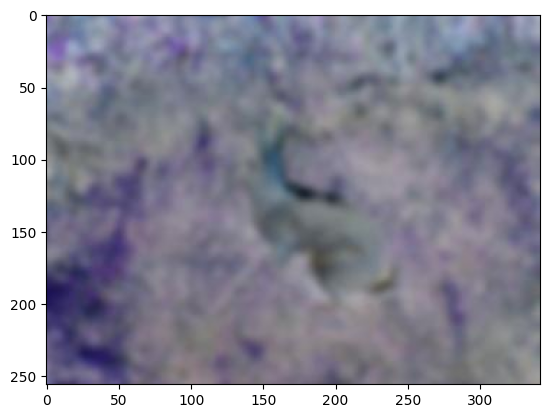

In [12]:
image = cv.imread("./image.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

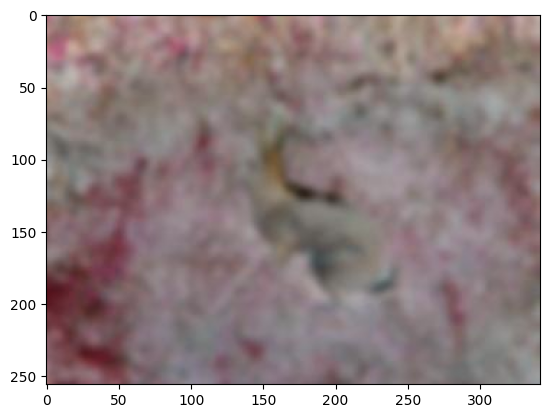

In [18]:
image_bgr = cv.cvtColor(image, cv.COLOR_RGB2BGR)
plt.imshow(image_bgr)

Строим гистограмму интенсивности серого изображения.

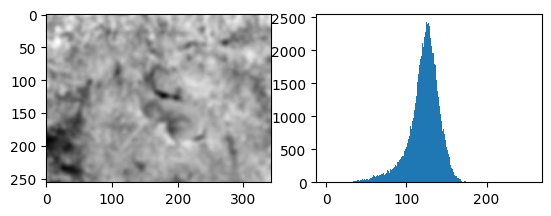

In [14]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
gs = plt.GridSpec(2, 2)
range = [0, 256]
plt.figure()
plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')
plt.subplot(gs[1])
plt.hist(gray_image.reshape(-1), 256, range)
plt.show()

Лямбда-функция, которая выполняет эквализацию гистограммы для серого изображения. Происходит вычисление кумулятивной суммы гистограммы и последующее масштабирование к значениям от 0 до 255

In [15]:
equalize_image = lambda img: (255 * np.cumsum(cv.calcHist([img], [0], None, [256], [0, 256])) / np.sum(cv.calcHist([img], [0], None, [256], [0, 256]))).astype(np.uint8)[img]

Продолжается процесс эквализации гистограммы для серого изображения и визуализируются результаты.

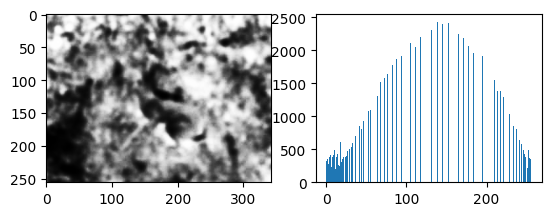

In [16]:
eq_image = equalize_image(gray_image)
plt.figure()
plt.subplot(gs[0])
plt.imshow(eq_image, cmap='gray')
plt.subplot(gs[1])
plt.hist(eq_image.reshape(-1), 256, range)
plt.show()